In [2]:
import os
print("current directory:",os.getcwd())
import torch
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import seaborn as sns

num_gpu = torch.cuda.device_count()
print("num_gpu:",num_gpu)

current directory: /oscar/data/gk/skhodaka/Optical_to_IR_git
num_gpu: 1


### Training Example

In [ ]:
!python train.py --name NAME  --direction AtoB --display_id -1 --input_nc 8 --output_nc 1 --batch_size 16 --n_epochs 25 --n_epochs_decay 75 --gan_mode='lsgan' --lr 0.0007 --lr_policy 'cosine' --netG unet_256 --continue_train 

### For continuing a training run
# --continue_train --epoch_count ... --lr ... 

### Test Example

In [ ]:
!python test.py --name NAME --input_nc 8 --output_nc 1 --direction AtoB --no_flip --netG unet_256 --num_test 199 --epoch 120 

## Set the checkpoint name and epoch number accordingly

### Error calculation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
results_dir = './results/Name/test_120/images/'
list_all = sorted(os.listdir(results_dir))
images = [i.split(')')[0] + ')' for i in list_all]
images = list(set(images))
#images

error = 0
error_rel = 0
for i in images:
    real_img = np.load(results_dir + i+'_real_B.png.npy')
    fake_img = np.load(results_dir + i+'_fake_B.png.npy')
    error+= np.mean(255*np.abs(real_img-fake_img))
    error_rel+=np.linalg.norm(real_img-fake_img)/np.linalg.norm(real_img)

MAE = error/len(images)
Rel = error_rel/len(images)
print("sum_error:",error)
print("MAE:",MAE)
print("Relative Error:",Rel)

SSIM = 0
for i in images:
    real_img = np.load(results_dir + i+'_real_B.png.npy')
    fake_img = np.load(results_dir + i+'_fake_B.png.npy')
    SSIM+= ssim(real_img,fake_img, data_range=1.0)
SSIM = SSIM/len(images)

### Visualization

In [22]:
results_dir = './results/IR_test1/test_120/images/'
example = 'CuO_PDMS 7.3kPa (24)'
Image_example = example + '_real_B.png'
IR_example_real = example + '_real_B.png'
IR_example_fake = example + '_fake_B.png'
x = np.load(results_dir + Image_example +'.npy')
real_img = np.load(results_dir + IR_example_real + '.npy')
fake_img = np.load(results_dir + IR_example_fake + '.npy')

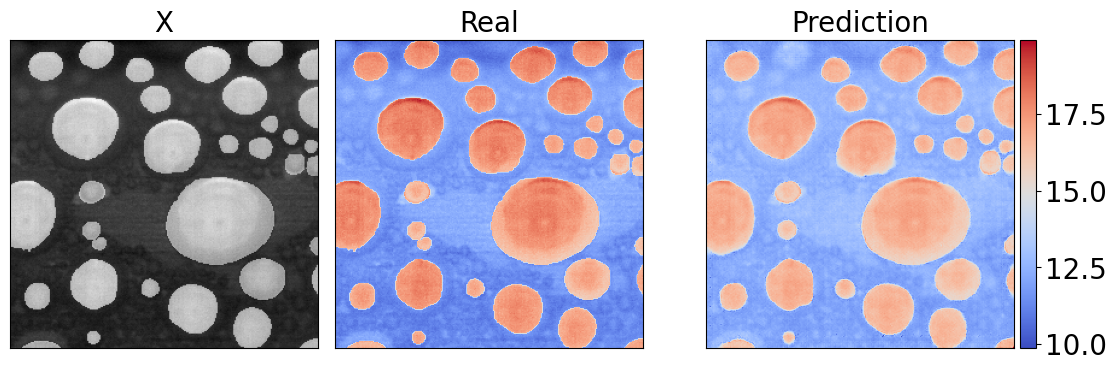

In [23]:
fig , (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4))
img = ax1.imshow(x,cmap='gray')
# real_T = ax2.imshow(real_img*255,cmap='coolwarm', vmin=20, vmax=40)
# fake_T = ax3.imshow(fake_img*255, cmap='coolwarm', vmin=20, vmax=40)
real_T = ax2.imshow(real_img*255,cmap='coolwarm')
fake_T = ax3.imshow(fake_img*255, cmap='coolwarm')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])

ax1.set_title('X', fontsize=20)
ax2.set_title('Real', fontsize=20)
ax3.set_title('Prediction', fontsize=20)
# cbar = plt.colorbar(fake_T, ax=ax3, pad=0.01, ticks=[20,40])
cbar = plt.colorbar(fake_T, ax=ax3, pad=0.01)

cbar.ax.tick_params(labelsize=20)

plt.subplots_adjust(wspace=-0.45)